In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('E:/Data Science/1.Courses/7. Python for Data Science 2021/20-Natural-Language-Processing/yelp.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


# Exploratory Data Analysis

#### Drop the unwanted columns

In [4]:
df.drop(labels = ['business_id', 'review_id', 'user_id'], inplace = True, axis = 1)

In [7]:

print(df.shape)
df.head()

(10000, 7)


,date,stars,text,type,cool,useful,funny
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0,1,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0


In [9]:
df.type.value_counts

<bound method IndexOpsMixin.value_counts of 0       review
1       review
2       review
3       review
4       review
         ...  
9995    review
9996    review
9997    review
9998    review
9999    review
Name: type, Length: 10000, dtype: object>

In [10]:
df.drop(labels = 'type', inplace = True, axis = 1)

In [11]:
df.head()

,date,stars,text,cool,useful,funny
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0


#### Create a column that reads the length of text in each document message across the corpus

In [12]:
df['length'] = df.text.apply(len)
df.head()

,date,stars,text,cool,useful,funny,length
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


In [14]:
df.length.sort_values(ascending = False)

55      4997
2622    4986
4033    4975
3686    4972
1870    4968
        ... 
9688       6
2931       6
7881       4
6708       2
6450       1
Name: length, Length: 10000, dtype: int64

#### Lets see if the length of the messages has to do anything with the rating

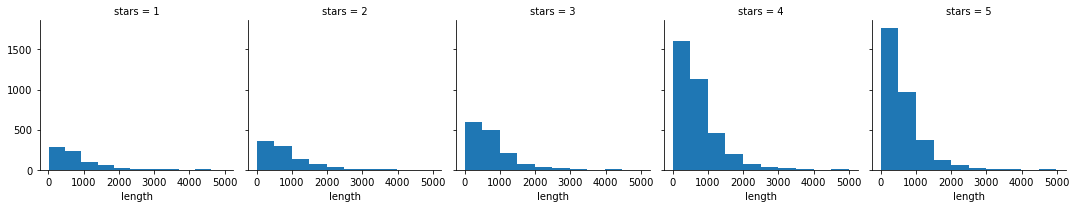

In [19]:
g = sns.FacetGrid(data = df, col = 'stars' )
g.map(plt.hist,'length' )

#### We see that ratings with 4 & 5 stars have mean length double that of those with rating 1, 2 & 3 stars

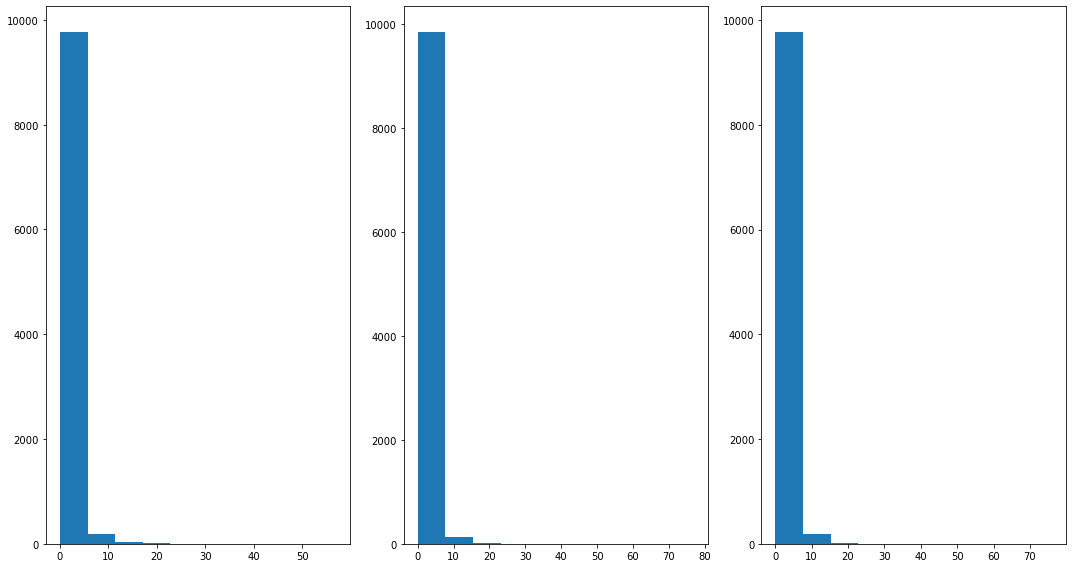

In [52]:
plt.figure(figsize = (15,8))

plt.subplot(1,3,1)
plt.hist(data = df, x = 'funny')

plt.subplot(1,3,2)
plt.hist(data = df, x = 'cool')

plt.subplot(1,3,3)
plt.hist(data = df, x = 'useful')

plt.tight_layout()

In [54]:
df.groupby('stars').agg({'cool' : ['mean', 'max'],
                         'funny' : ['mean','max'],
                         'useful' : ['mean','max']})

cool         funny        useful    
           mean max      mean max      mean max
stars                                          
1      0.576769  17  1.056075  30  1.604806  20
2      0.719525  14  0.875944  20  1.563107  17
3      0.788501  18  0.694730  24  1.306639  19
4      0.954623  38  0.670448  57  1.395916  38
5      0.944261  77  0.608631  39  1.381780  76

In [56]:
df[df['cool'] == 77]

,date,stars,text,cool,useful,funny,length
4957,2011-10-03,5,Love this place! Amazing Happy Hour Specials!!,77,76,0,46


<AxesSubplot:>

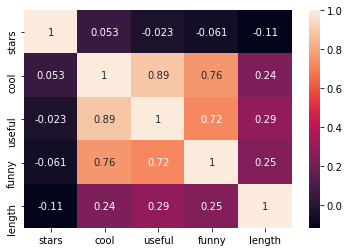

In [42]:
sns.heatmap(df.corr(), annot = True)

#### Let's move to the ML classification part 

##### Let's breakdown the data by only keeping stars value 1 & 5 for purpose of classification

In [59]:
df_cls = df[(df['stars'] == 1) | (df['stars'] == 5)]
df_cls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4086 non-null   object
 1   stars   4086 non-null   int64 
 2   text    4086 non-null   object
 3   cool    4086 non-null   int64 
 4   useful  4086 non-null   int64 
 5   funny   4086 non-null   int64 
 6   length  4086 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 255.4+ KB


In [57]:
from sklearn.feature_extraction.text import CountVectorizer


In [58]:
cv = CountVectorizer()

In [60]:
x = df_cls['text']
y = df_cls['stars']

In [61]:
X = cv.fit_transform(x)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
nb = MultinomialNB()

In [66]:
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



array([[159,  69],
       [ 22, 976]], dtype=int64)

#### This was with only bag of words, model. Let's implement TF-IDF

## TF-IDF

#### We will use pipeline for this

In [72]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [73]:
pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('nb_model', MultinomialNB())])

In [74]:
Xt = df_cls['text']
yt = df_cls['stars']

In [75]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.3, random_state=101)

In [76]:
pipe.fit(Xt_train, yt_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb_model', MultinomialNB())])

In [77]:
yt_pred = pipe.predict(Xt_test)

In [78]:
print(classification_report(yt_test, yt_pred))
confusion_matrix(yt_test, yt_pred)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0, 228],
       [  0, 998]], dtype=int64)

In [79]:
pwd

'C:\\Users\\shree'